In [1]:
from matplotlib import pyplot as plt
import random
from copy import deepcopy
import networkx as nx
import callable
import time
import os
import numpy as np
from tabulate import tabulate
from time import perf_counter
import seaborn as sns
import pandas as pd
import csv
import re

In [2]:
def readResults(dir, name):
    files = os.listdir(dir)
    sumRes = {}
    for file in files:
        if not re.search(name,file):
            continue

        ime = file+"delta"
        filepath = os.path.join(dir,file)
        data = []
        with open(filepath) as f:
            reader = csv.reader(f,delimiter='\t')
            for row in reader:
                data.append(row)
        if len(data) > 30:
            del data[:28]
            ime = file+"delta+1"

        sumRes[file+"delta"] = 0
        sumRes[file+"delta+1"] = 0
        for row in data[4:-2:2]:
            tmp = row[0].split()
            del tmp[::2]

            if int(tmp[3]) == 0:
                sumRes[ime] += 1
            
            pass
    
    return sumRes



In [3]:
def readResultsGA(dir, name):
    files = os.listdir(dir)
    sumRes = {}
    for file in files:
        if not re.search(name,file):
            continue

        ime = file+"delta"
        filepath = os.path.join(dir,file)
        data = []
        with open(filepath) as f:
            reader = csv.reader(f,delimiter='\t')
            for row in reader:
                data.append(row)
        if len(data) > 70:
            del data[:59]
            ime = file+"delta+1"

        sumRes[file+"delta"] = 0
        sumRes[file+"delta+1"] = 0
        for row in data[8:62:2]:
            tmp = row[0].split()
            del tmp[::2]            

            if int(tmp[4]) == 0:
                sumRes[ime] += 1
                

    return sumRes



In [ ]:
def stats(dir, regex, title, dirGA):
    sumRes = readResults(dir, regex)
    sumResGA = readResultsGA(dirGA, regex)
    
    vnsDelta = [round(x / 12*100,2) for x in list(sumRes.values())[::2]]
    vnsDelta1 = [round(x / 12*100,2) for x in list(sumRes.values())[1::2]]
    gaDelta = [round(x / 12*100,2) for x in list(sumResGA.values())[::2]]
    gaDelta1 = [round(x / 12*100,2) for x in list(sumResGA.values())[1::2]]
    graphs = list(sumRes.keys())[::2]
    graphs = [x.split('.t')[0]  for x in list(sumResGA.keys())[1::2]]

    x = np.arange(len(graphs))
    width = 0.2

    plt.figure(figsize=(10, 5))

    plt.bar(x - 1.5*width, vnsDelta, width, label="VNS Δ",edgecolor="black",linewidth=0.7)
    plt.bar(x - 0.5*width, vnsDelta1,  width, label="VNS Δ + 1",edgecolor="black",linewidth=0.7)
    plt.bar(x + 0.5*width, gaDelta,  width, label="GA + LS Δ",edgecolor="black",linewidth=0.7)
    plt.bar(x + 1.5*width, gaDelta1,   width, label="GA + LS Δ + 1",edgecolor="black",linewidth=0.7)

    plt.xticks(x, graphs)
    plt.ylim(0, 100)
    plt.ylabel("Success rate (%)")
    plt.xlabel(f'{title} graphs')
    plt.legend()
    plt.grid(axis='y', linestyle='-', alpha=0.6)
    plt.tight_layout()
    plt.show()


    


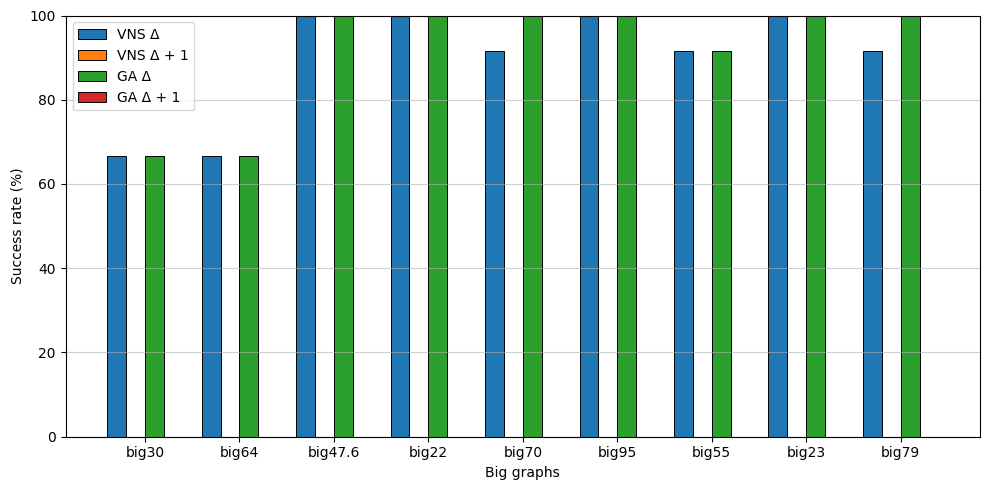

In [5]:
stats("resultsVNS", "(big)", "Big","resultsGA")

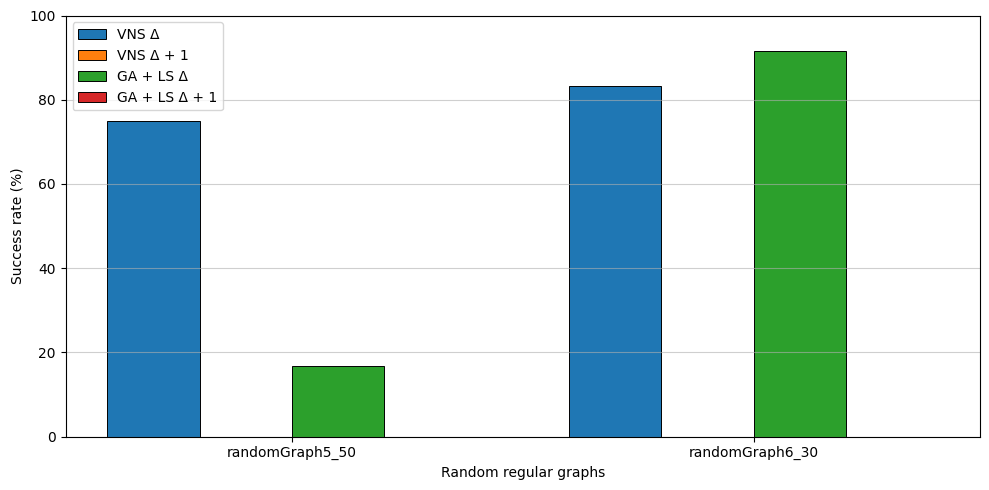

In [26]:
stats("resultsVNS","(random)","Random regular","resultsGA")

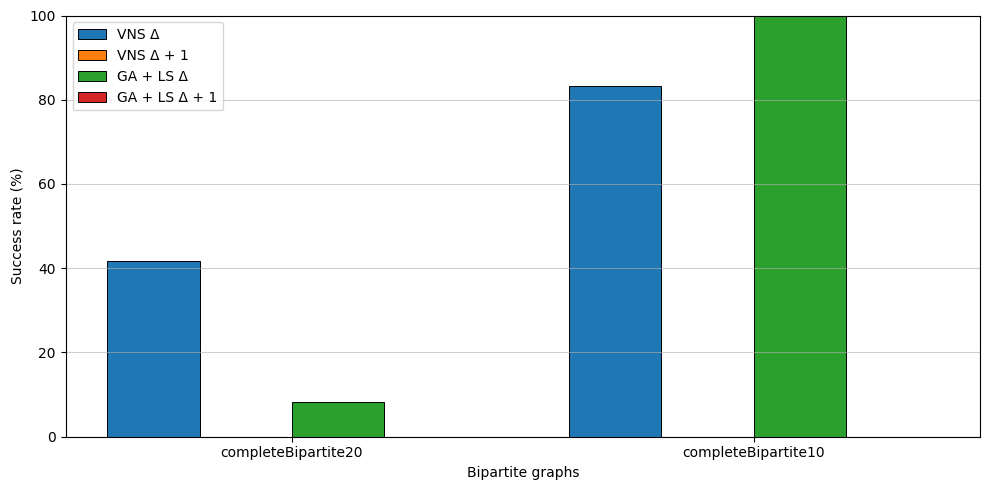

In [27]:
stats("resultsVNS","(Bipartite)","Bipartite", "resultsGA")

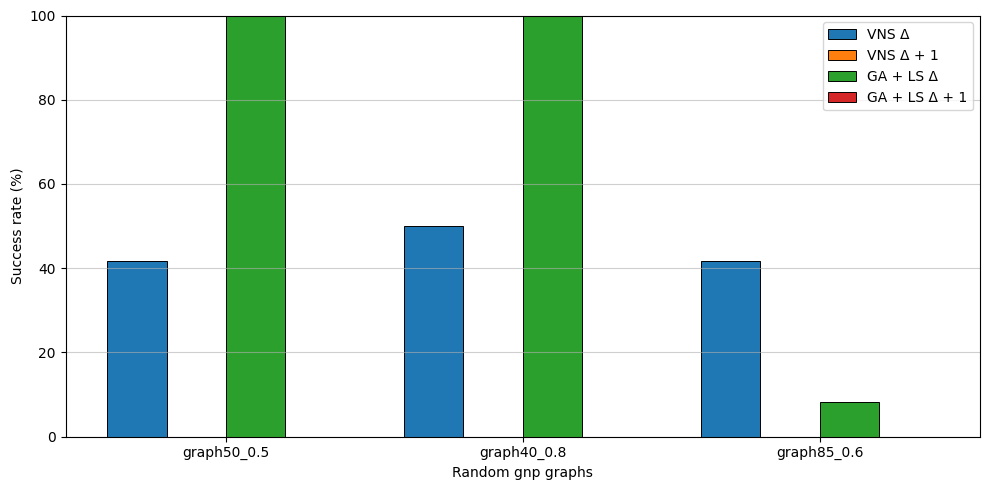

In [28]:
stats("resultsVNS","(graph)\\d*_","Random gnp", "resultsGA")

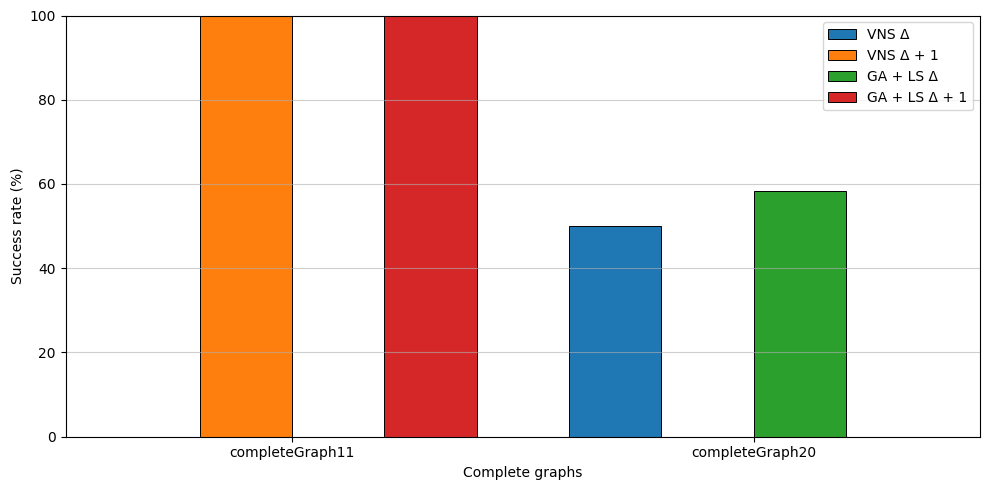

In [29]:
stats("resultsVNS","(completeGraph)","Complete","resultsGA")

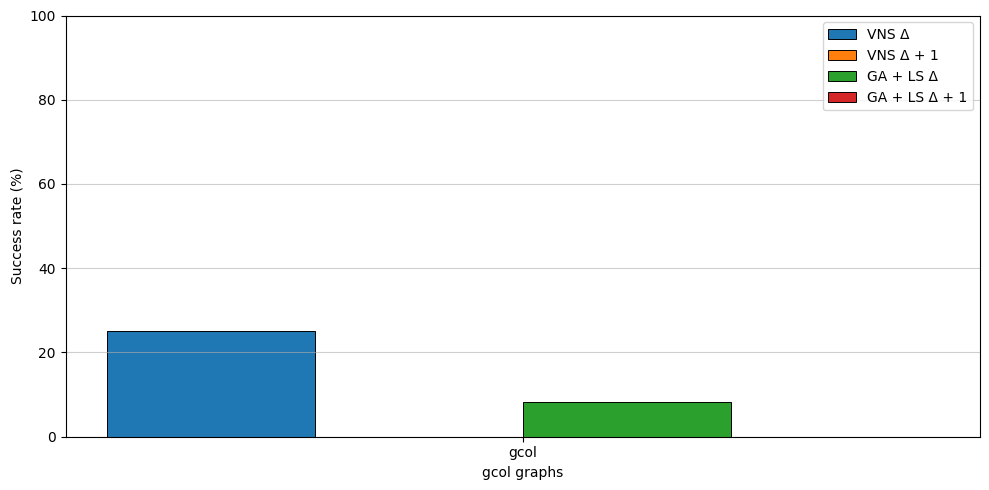

In [30]:
stats("resultsVNS","(gcol)","gcol","resultsGA")